In [1]:
import torch
import torch.nn as nn

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from einops import rearrange, repeat, reduce

from darts.datasets import AirPassengersDataset

In [3]:
U, S, Vh = torch.linalg.svd(torch.rand(10,15))
torch.diag(S)

tensor([[6.5561, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 1.8396, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 1.6098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 1.4172, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.1139, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9638, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7884, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7321, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4473,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4238]])

In [65]:
from darts.datasets import AirPassengersDataset

In [66]:
data = AirPassengersDataset().load()
time_series = data.values()
time_series.shape

(144, 1)

In [67]:
data.head(3)

<TimeSeries (DataArray) (Month: 3, component: 1, sample: 1)> Size: 24B
array([[[112.]],

       [[118.]],

       [[132.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 24B 1949-01-01 1949-02-01 1949-03-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [68]:
data.components
#data.columns

Index(['#Passengers'], dtype='object', name='component')

In [69]:
print(data.is_univariate)
print(data.is_stochastic)
print(data.is_deterministic)
print(data.is_probabilistic)

True
False
True
False


In [70]:
data.pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


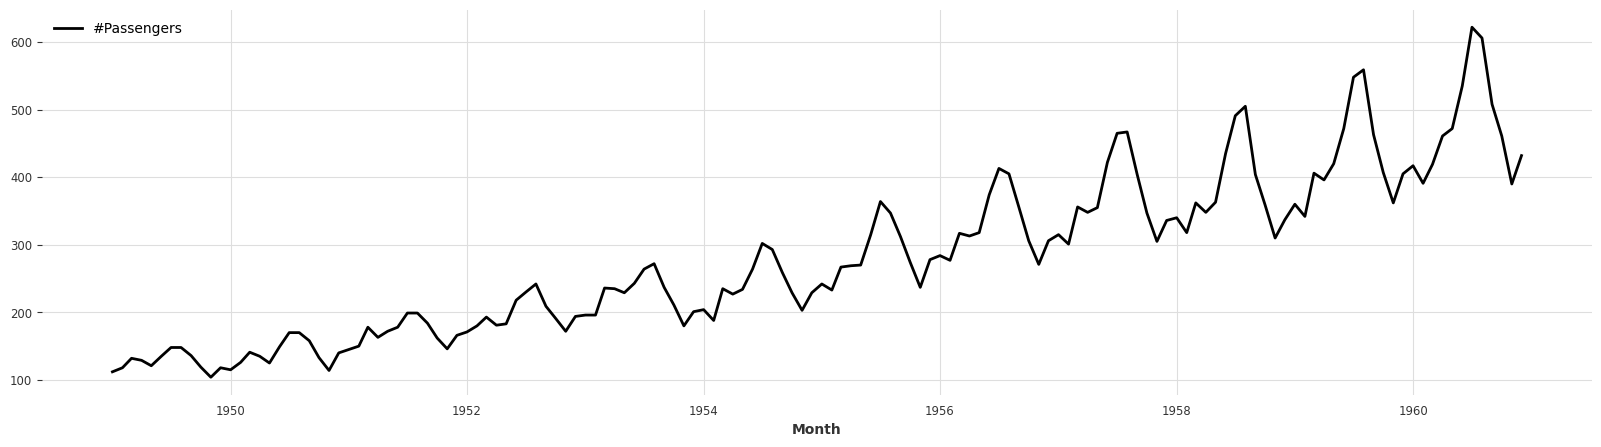

In [ ]:
plt.figure(figsize=(20,5))
data.plot()
plt.show()

<Axes: xlabel='Month'>

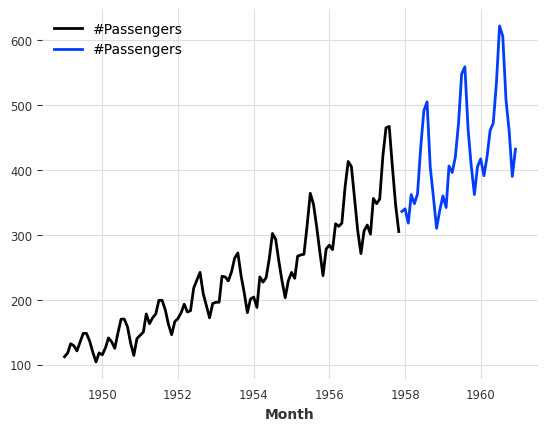

In [71]:
train, test = data.split_before(0.75)
train.plot()
test.plot()

In [60]:
from darts.models.forecasting.auto_arima import AutoARIMA

In [73]:
model = AutoARIMA()
model.fit(train)
pred = model.predict(n=36)

<Axes: xlabel='Month'>

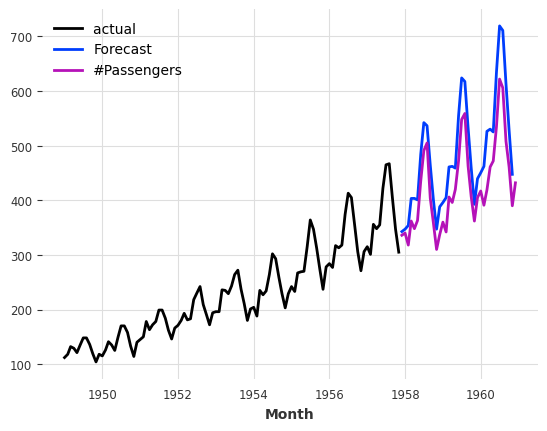

In [78]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [75]:
from darts.models import NBEATSModel

In [76]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=123)
model.fit(train)
pred = model.predict(n=36, series=train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Month'>

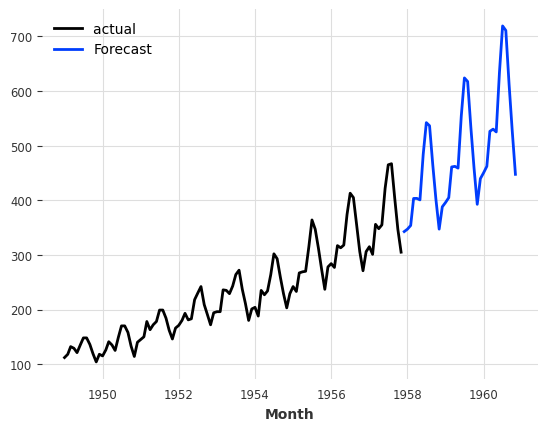

In [77]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')